# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [38]:
dataset_train = pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [40]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [43]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [44]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [45]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [46]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [47]:
'''regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))'''
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding a fifth LSTM layer and some Dropout regularisation

In [48]:
#regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

### Adding the output layer

In [49]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [50]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [51]:
regressor.fit(X_train, y_train, epochs = 250, batch_size = 32)

Epoch 1/250
38/38 [==============================] - 7s 14ms/step - loss: 0.0405
Epoch 2/250
38/38 [==============================] - 1s 13ms/step - loss: 0.0067
Epoch 3/250
38/38 [==============================] - 1s 14ms/step - loss: 0.0052
Epoch 4/250
38/38 [==============================] - 0s 13ms/step - loss: 0.0049
Epoch 5/250
38/38 [==============================] - 1s 13ms/step - loss: 0.0044
Epoch 6/250
38/38 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 7/250
38/38 [==============================] - 1s 13ms/step - loss: 0.0051
Epoch 8/250
38/38 [==============================] - 1s 14ms/step - loss: 0.0047
Epoch 9/250
38/38 [==============================] - 1s 13ms/step - loss: 0.0045
Epoch 10/250
38/38 [==============================] - 1s 13ms/step - loss: 0.0042
Epoch 11/250
38/38 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 12/250
38/38 [==============================] - 0s 13ms/step - loss: 0.0038
Epoch 13/250
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price 

In [52]:
dataset_test = pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price 

In [53]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


### Visualising the results

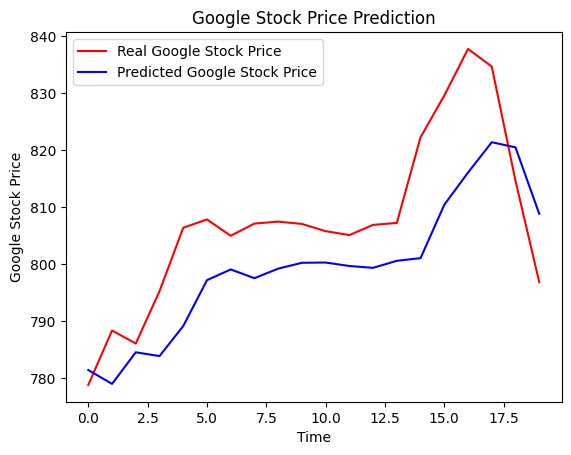

In [54]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

**RNN Model Evaluation Summary:**

1. **Lag in Fast, Nonlinear Changes:**
   - The model exhibits a lag in predicting fast, nonlinear changes.
   - Notably, during stock time irregularities or spikes, the predictions fall behind actual values.

2. **Normalcy in Lag Behavior:**
   - The lag behavior during spikes aligns with the Brownian Motion concept in financial engineering.
   - According to the concept, future stock price variations are independent of past values, justifying the lag in reacting to sudden changes.

3. **Effective Response to Smooth Changes:**
   - The model demonstrates effectiveness in capturing smooth changes.
   - It successfully follows upward and downward trends, displaying resilience in response to stable and gradual market shifts.

4. **Optimal Performance in Trend Following:**
   - During stable periods, the model accurately follows trends, particularly upward and downward movements.
   - Notable success in capturing and mirroring the financial market's general direction during smoother transitions.

5. **Conclusion:**
   - Lag in response during spikes is a normal behavior due to the model's inability to react rapidly to nonlinear changes.
   - The model's proficiency in tracking and predicting smooth changes positions it as a valuable tool for understanding and forecasting market trends.

**So,Although the RNN model was not able follow the exact stock prices it managed to follow the upwards the stable and the downward trend at the end.**